In [ ]:


                                                           #   task 1



In [ ]:
Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not.
 This is a classic beginnerproject with readily available data.
The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, and whether they survived.

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Titanic-Dataset.csv'
titanic_df = pd.read_csv(file_path)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Inspect the dataset

print(titanic_df.info())
print(titanic_df.describe())

# Check for missing values
print(titanic_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [ ]:
# Fill missing age values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing embarked values with the most common port
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

# Fill missing fare values with the median fare
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)


In [ ]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
cleaned_data = titanic_df
cleaned_data.to_csv('cleaned_titanic_Data.csv', index=False)

print("Cleaned data has been saved to 'cleaned_titanic_Data.csv'.")

Cleaned data has been saved to 'cleaned_titanic_Data.csv'.


In [ ]:
# Convert 'Sex' to numerical values
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical values
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [ ]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,2
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0


In [ ]:
# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_df[features]
y = titanic_df['Survived']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

[[90 15]
 [18 56]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
}

# Initialize and fit the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


In [ ]:
# Prepare a DataFrame with the results
output_df = X_test.copy()
output_df['Actual'] = y_test
output_df['Predicted'] = y_pred_best

# Save the results to a CSV file
output_file_path = 'Titanic_Predictions.csv'
output_df.to_csv(output_file_path, index=False)

print(f"Predictions saved to {output_file_path}")


Predictions saved to Titanic_Predictions.csv


In [ ]:
#visualization part
import pandas as pd

# Load the original dataset and predictions
file_path = '/content/cleaned_titanic_Data.csv'
titanic_df = pd.read_csv(file_path)

output_file_path = '/content/Titanic_Predictions.csv'
predictions_df = pd.read_csv(output_file_path)


In [ ]:
# Handle missing values and convert categorical features to numerical values (repeat from earlier steps if necessary)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
# Check if 'Cabin' column exists before dropping
if 'Cabin' in titanic_df.columns:
    titanic_df.drop(columns=['Cabin'], inplace=True)  # Drop 'Cabin' column if it exists
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Prepare features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_df[features]
y = titanic_df['Survived']

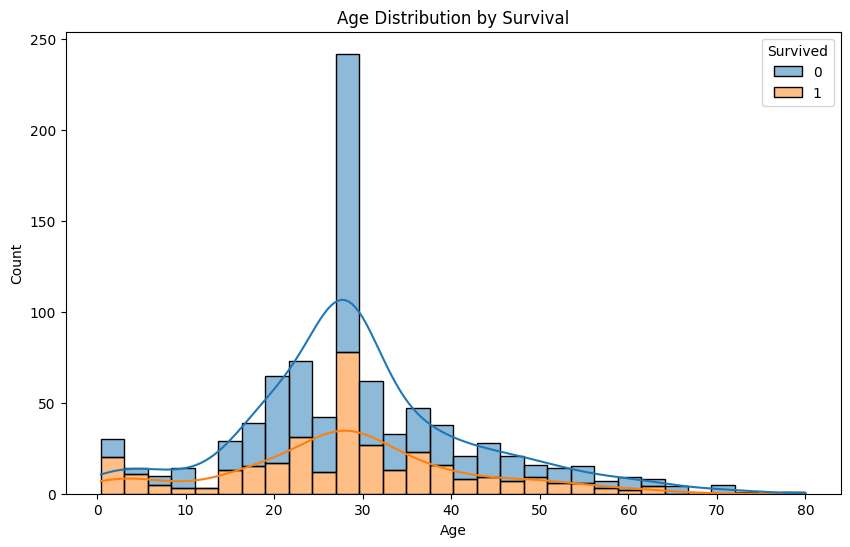

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


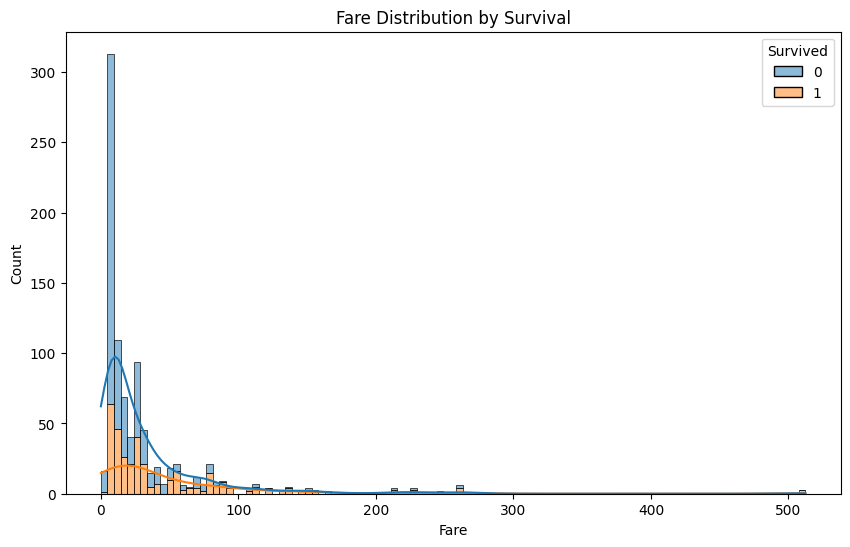

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


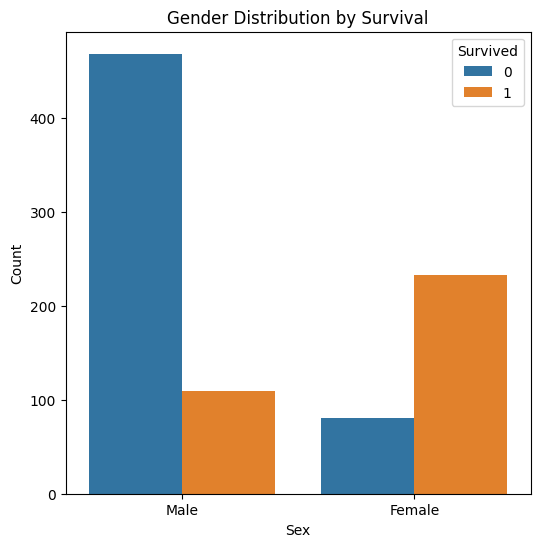

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=titanic_df, x='Sex', hue='Survived')
plt.title('Gender Distribution by Survival')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()


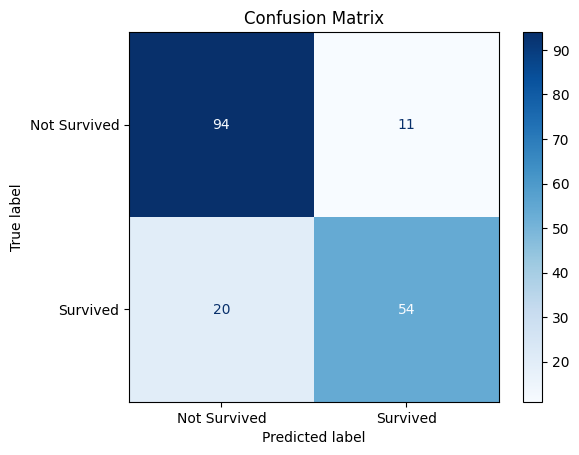

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(predictions_df['Actual'], predictions_df['Predicted'])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


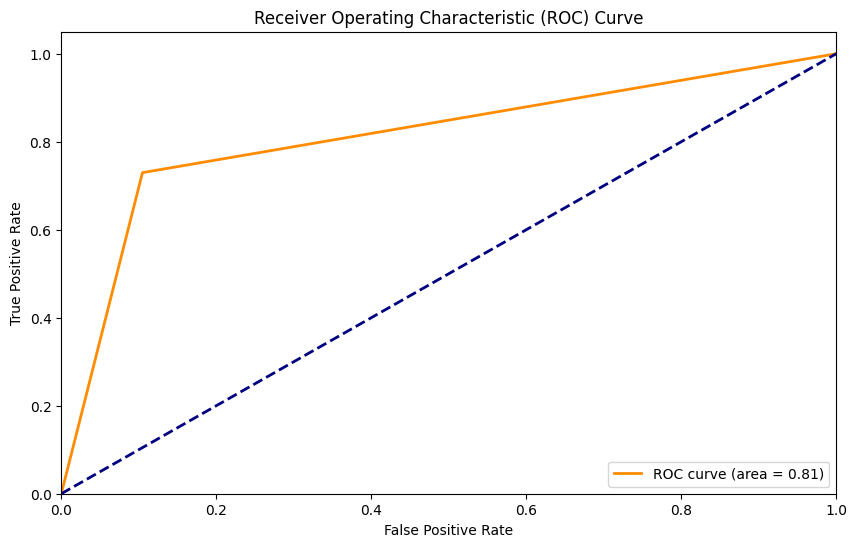

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(predictions_df['Actual'], predictions_df['Predicted'])
roc_auc = roc_auc_score(predictions_df['Actual'], predictions_df['Predicted'])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


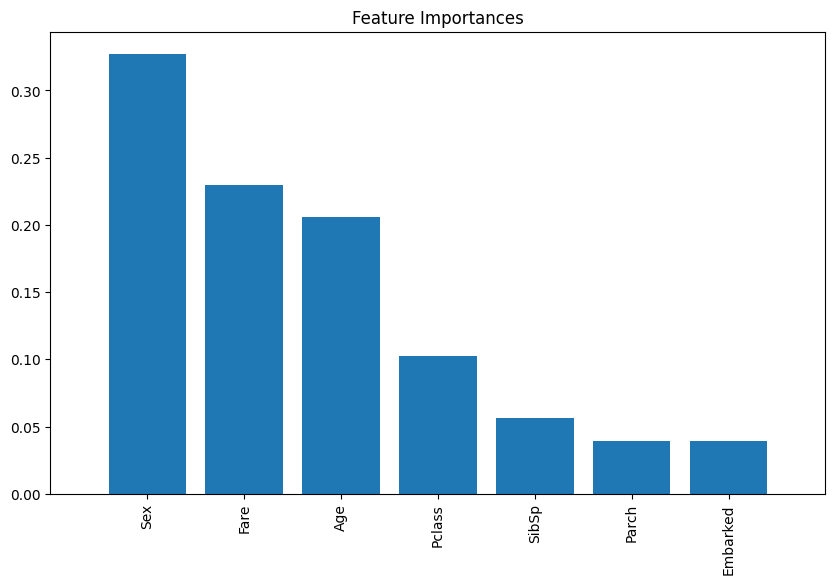

In [ ]:
import numpy as np

# Assuming `best_model` is the final tuned model
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
